<ipython-input-1-1c6412ddbadf>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)


<ipython-input-1-1c6412ddbadf>:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




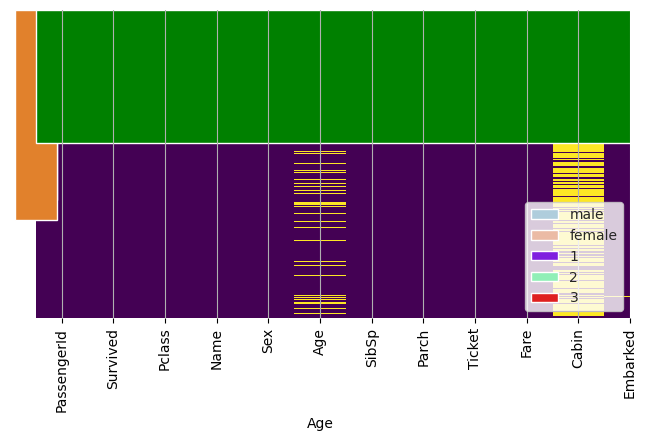

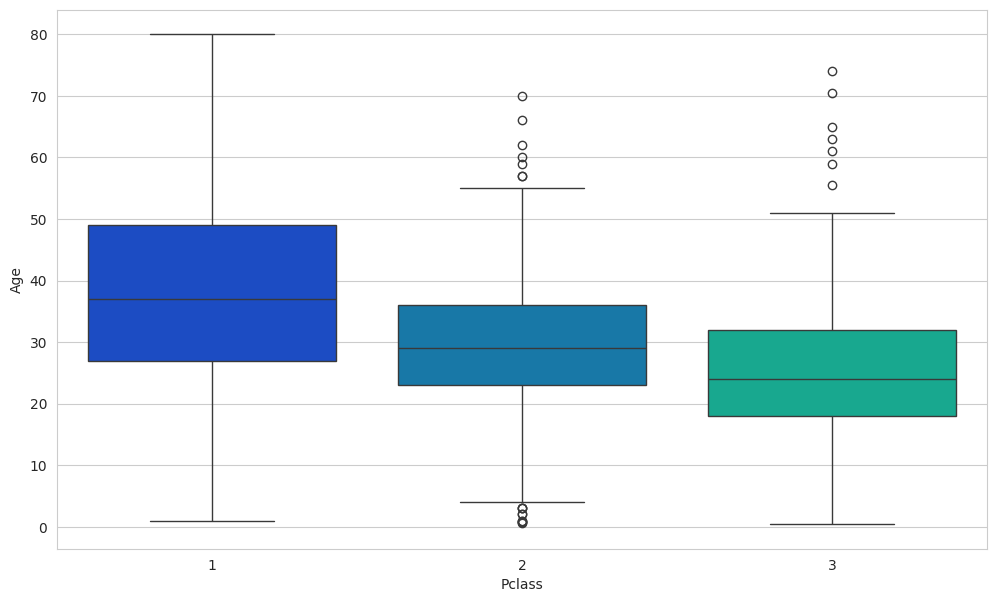

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline

train = pd.read_csv('titanic_train.csv')

train.head()
train.isnull()
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)
train['Age'].hist(bins=30,color='darkred',alpha=0.3)
sns.countplot(x='SibSp',data=train)
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
import cufflinks as cf
cf.go_offline()
train['Fare'].iplot(kind='hist',bins=30,color='green')
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
    train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)
    sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    train.drop('Cabin', axis=1, inplace=True)
    train.head()
    train.dropna(inplace=True)
    train.info()
    pd.get_dummies(train['Embarked'], drop_first=True).head()
    sex = pd.get_dummies(train['Sex'], drop_first=True)
    embark = pd.get_dummies(train['Embarked'], drop_first=True)
    train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
    train.head()
    train = pd.concat([train, sex, embark], axis=1)
    train.head()
    train.drop('Survived', axis=1).head()
